In [1]:
import tensorflow as tf

from modules.training.cme_modeling import ModelBuilder as MB

C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
C:\Users\the_3\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If 

In [2]:
from modules.training.phase_manager import TrainingPhaseManager

# instantiate the model_builder
mb = MB()
pm = TrainingPhaseManager()  # Training phase manager

In [3]:
# y_true = tf.constant([[-1.0],
#                       [ 3],
#                       [ 1.0]])
# 
# z_pred = tf.constant([[-1.0,  1.0],
#                       [ 0.5,  0.0],
#                       [ 1.0, -1.0],
#                       ])

y_true = tf.constant([[1.0],
                      [2.0],
                      [3.0]])

z_pred = tf.constant([[1.0, 1.0],
                      [2.0, 2.0],
                      [3.0, 3.0],
                      ])


In [4]:
loss = mb.pdc_loss_vec(y_true, z_pred, pm)
print(f"PDC Loss: {loss.numpy()}")

Dy_mean: 2.0, Dz_mean: 4.0
Dy_centered: [[-2. -1.  2.]
 [-1. -2. -1.]
 [ 2. -1. -2.]], Dz_centered: [[-4. -2.  4.]
 [-2. -4. -2.]
 [ 4. -2. -4.]]
tf.Tensor(
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]], shape=(3, 3), dtype=float32)
cov_Dy_Dz: 24.0, var_Dy: 12.0, var_Dz: 48.0
pcc: 1.0
PDC Loss: 0.0


In [5]:
loss = mb.pdc_loss_vec_old(y_true, z_pred, pm)
print(f"PDC Loss: {loss.numpy()}")

mean_Dy: 2.0, mean_Dz: 4.0
Dy_centered: [-1.  2. -1.], Dz_centered: [-2.  4. -2.]
cov_Dy_Dz: 12.0, var_Dy: 6.0, var_Dz: 24.0
pcc: 1.0
PDC Loss: 0.0


In [6]:
import numpy as np

# Parameters
num_points = 200  # 201 points for labels from -100 to 100 inclusive

# Create evenly spaced labels from -100 to 100
labels = np.linspace(-100, 100, num_points)
# update the dimension of labels
labels = np.expand_dims(labels, axis=1)

# Generate points like (0, 0), (1, 1), ..., (200, 200)
points = np.array([(i, i) for i in range(num_points)])

# convert to tensor float32
labels = tf.constant(labels, dtype=tf.float32)
points = tf.constant(points, dtype=tf.float32)

# Random sample weights between 0 and 1
sample_weights = np.random.rand(num_points)

In [20]:
loss = mb.pdc_loss_vec(labels, points, pm)
print(f"PDC Loss: {loss.numpy(): .4f}")

Dy_mean: 6767.50634765625, Dz_mean: 13400.0
Dy_centered: [[-6767.5063 -6766.496  -6763.466  ... 32432.518  32831.49   33232.492 ]
 [-6766.496  -6767.5063 -6766.496  ... 32035.553  32432.514  32831.49  ]
 [-6763.466  -6766.496  -6767.5063 ... 31640.615  32035.553  32432.518 ]
 ...
 [32432.518  32035.553  31640.615  ... -6767.5063 -6766.496  -6763.466 ]
 [32831.49   32432.514  32035.553  ... -6766.496  -6767.5063 -6766.496 ]
 [33232.492  32831.49   32432.518  ... -6763.466  -6766.496  -6767.5063]], Dz_centered: [[-13400. -13398. -13392. ...  64218.  65008.  65802.]
 [-13398. -13400. -13398. ...  63432.  64218.  65008.]
 [-13392. -13398. -13400. ...  62650.  63432.  64218.]
 ...
 [ 64218.  63432.  62650. ... -13400. -13398. -13392.]
 [ 65008.  64218.  63432. ... -13398. -13400. -13398.]
 [ 65802.  65008.  64218. ... -13392. -13398. -13400.]]
tf.Tensor(
[[0. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 

In [21]:
loss = mb.pdc_loss_vec_old(labels, points, pm)
print(f"PDC Loss: {loss.numpy(): .4f}")

mean_Dy: 6767.50634765625, mean_Dz: 13400.0
Dy_centered: [-6766.496  -6763.466  -6758.4155 ... -6766.496  -6763.466  -6766.496 ], Dz_centered: [-13398. -13392. -13382. ... -13398. -13392. -13398.]
cov_Dy_Dz: 2504762851328.0, var_Dy: 1264999989248.0, var_Dz: 4959555813376.0
pcc: 0.9999998807907104
PDC Loss:  0.0000


Epoch 1/600
Dy_mean: Tensor("pdc_loss/truediv:0", shape=(), dtype=float32), Dz_mean: Tensor("pdc_loss/truediv_1:0", shape=(), dtype=float32)
Dy_centered: Tensor("pdc_loss/sub_3:0", shape=(None, None), dtype=float32), Dz_centered: Tensor("pdc_loss/sub_4:0", shape=(None, None), dtype=float32)
Tensor("pdc_loss/set_diag:0", shape=(None, None), dtype=float32)
cov_Dy_Dz: Tensor("pdc_loss/Sum_3:0", shape=(), dtype=float32), var_Dy: Tensor("pdc_loss/Sum_4:0", shape=(), dtype=float32), var_Dz: Tensor("pdc_loss/Sum_5:0", shape=(), dtype=float32)
pcc: Tensor("pdc_loss/truediv_2:0", shape=(), dtype=float32)
Dy_mean: Tensor("pdc_loss/truediv:0", shape=(), dtype=float32), Dz_mean: Tensor("pdc_loss/truediv_1:0", shape=(), dtype=float32)
Dy_centered: Tensor("pdc_loss/sub_3:0", shape=(None, None), dtype=float32), Dz_centered: Tensor("pdc_loss/sub_4:0", shape=(None, None), dtype=float32)
Tensor("pdc_loss/set_diag:0", shape=(None, None), dtype=float32)
cov_Dy_Dz: Tensor("pdc_loss/Sum_3:0", shape=(), dtyp

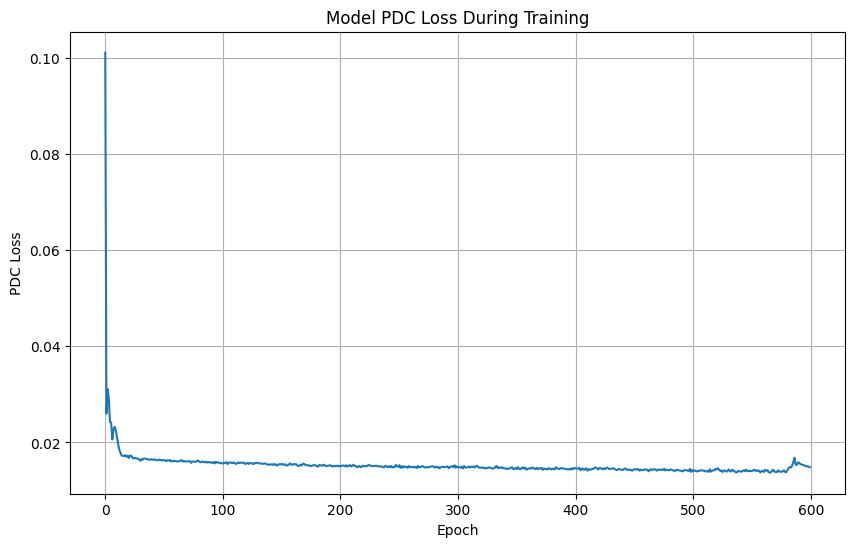

4/4 [==============================] - 0s 4ms/step


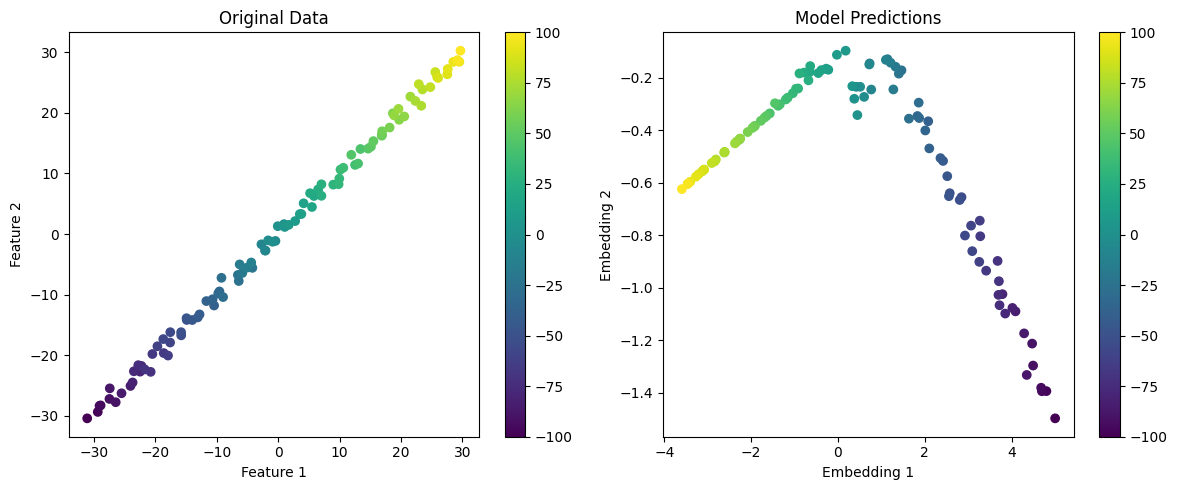

In [19]:
from modules.training.normlayer import NormalizeLayer
from modules.training.phase_manager import IsTraining
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

class PDCTrainer:
    def __init__(self, input_dim=2, hidden_dims=[64, 32], output_dim=2):
        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.output_dim = output_dim
        self.phase_manager = TrainingPhaseManager()
        self.model = self.build_model()
        
    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        x = inputs
        
        # Hidden layers
        for dim in self.hidden_dims:
            x = Dense(dim, activation='relu')(x)
            
        # Output layer
        # x =  NormalizeLayer(name='normalize_layer')(x)
        outputs = Dense(self.output_dim)(x)
        
        model = Model(inputs=inputs, outputs=outputs)
        return model
    
    def pdc_loss(self, y_true, y_pred):
        return mb.pdc_loss_vec(y_true, y_pred, self.phase_manager)
    
    def generate_synthetic_data(self, num_points=200):
        # Generate labels from -100 to 100
        labels = np.linspace(-100, 100, num_points)
        labels = np.expand_dims(labels, axis=1)
        
        # Generate input features (random noise + signal)
        noise = np.random.normal(0, 1, (num_points, self.input_dim))
        signal = np.repeat(labels, self.input_dim, axis=1)
        features = 0.3 * signal + 0.7 * noise
        
        return features, labels
    
    def compute_pairwise_correlation(self, features, predictions):
        """Compute pairwise correlation between features and predictions"""
        feat_dists = tf.reduce_sum(tf.square(features[:, tf.newaxis] - features[tf.newaxis, :]), axis=-1)
        pred_dists = tf.reduce_sum(tf.square(predictions[:, tf.newaxis] - predictions[tf.newaxis, :]), axis=-1)
        
        # Flatten the distance matrices
        feat_dists_flat = feat_dists.numpy().flatten()
        pred_dists_flat = pred_dists.numpy().flatten()
        
        # Compute correlation
        correlation, p_value = pearsonr(feat_dists_flat, pred_dists_flat)
        return correlation, p_value
    
    def train(self, epochs=1000, batch_size=32, verbose=1):
        # Generate synthetic data
        X_train, y_train = self.generate_synthetic_data()
        
        # Compile model
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=self.pdc_loss
        )
        
        # Convert to tf.data.Dataset
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_dataset = train_dataset.batch(batch_size)
        
        # Training history
        history = self.model.fit(
            train_dataset,
            epochs=epochs,
            verbose=verbose,
            callbacks=[IsTraining(self.phase_manager)]
        )
        
        # Final predictions
        predictions = self.model.predict(X_train)
        
        # Compute final correlation
        correlation, p_value = self.compute_pairwise_correlation(X_train, predictions)
        
        return history, correlation, p_value
    
    def plot_training_history(self, history):
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'])
        plt.title('Model PDC Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('PDC Loss')
        plt.grid(True)
        plt.show()

# Training example
trainer = PDCTrainer(input_dim=2, hidden_dims=[8, 16, 32, 32, 16, 8], output_dim=2)
history, final_correlation, p_value = trainer.train(epochs=600, batch_size=64)

# Print results
print(f"Final Pairwise Correlation: {final_correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Plot training history
trainer.plot_training_history(history)

# Visualize results
X_test, y_test = trainer.generate_synthetic_data(num_points=100)
predictions = trainer.model.predict(X_test)

plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap='viridis')
plt.colorbar()
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Predictions
plt.subplot(1, 2, 2)
plt.scatter(predictions[:, 0], predictions[:, 1], c=y_test.flatten(), cmap='viridis')
plt.colorbar()
plt.title('Model Predictions')
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')

plt.tight_layout()
plt.show()

Epoch 1/600
Dy_mean: Tensor("pdc_loss/truediv:0", shape=(), dtype=float32), Dz_mean: Tensor("pdc_loss/truediv_1:0", shape=(), dtype=float32)
Dy_centered: Tensor("pdc_loss/sub_3:0", shape=(None, None), dtype=float32), Dz_centered: Tensor("pdc_loss/sub_4:0", shape=(None, None), dtype=float32)
Tensor("pdc_loss/set_diag:0", shape=(None, None), dtype=float32)
cov_Dy_Dz: Tensor("pdc_loss/Sum_3:0", shape=(), dtype=float32), var_Dy: Tensor("pdc_loss/Sum_4:0", shape=(), dtype=float32), var_Dz: Tensor("pdc_loss/Sum_5:0", shape=(), dtype=float32)
pcc: Tensor("pdc_loss/truediv_2:0", shape=(), dtype=float32)
Dy_mean: Tensor("pdc_loss/truediv:0", shape=(), dtype=float32), Dz_mean: Tensor("pdc_loss/truediv_1:0", shape=(), dtype=float32)
Dy_centered: Tensor("pdc_loss/sub_3:0", shape=(None, None), dtype=float32), Dz_centered: Tensor("pdc_loss/sub_4:0", shape=(None, None), dtype=float32)
Tensor("pdc_loss/set_diag:0", shape=(None, None), dtype=float32)
cov_Dy_Dz: Tensor("pdc_loss/Sum_3:0", shape=(), dtyp

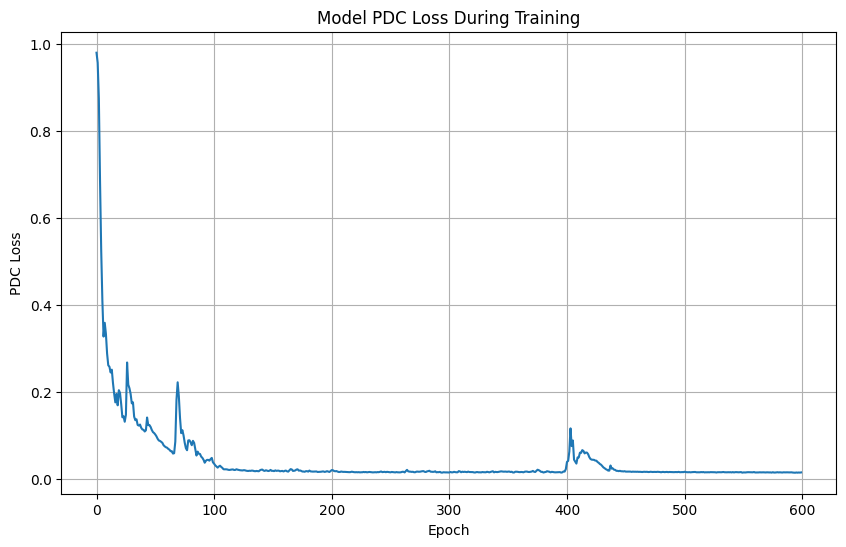

4/4 [==============================] - 0s 6ms/step


In [29]:
from modules.training.normlayer import NormalizeLayer
from modules.training.phase_manager import IsTraining
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

class PDCTrainer:
    def __init__(self, input_dim=2, hidden_dims=[64, 32], output_dim=2):
        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.output_dim = output_dim
        self.phase_manager = TrainingPhaseManager()
        self.model = self.build_model()
        
    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        x = inputs
        
        # Hidden layers
        for dim in self.hidden_dims:
            x = Dense(dim, activation='relu')(x)
            
        # Output layer
        
        outputs = Dense(self.output_dim)(x)
        outputs =  NormalizeLayer(name='normalize_layer')(outputs)
        model = Model(inputs=inputs, outputs=outputs)
        return model
    
    def pdc_loss(self, y_true, y_pred):
        return mb.pdc_loss_vec(y_true, y_pred, self.phase_manager)
    
    def generate_synthetic_data(self, num_points=200):
        # Generate labels from -100 to 100
        labels = np.linspace(-100, 100, num_points)
        labels = np.expand_dims(labels, axis=1)
        
        # Generate input features (random noise + signal)
        noise = np.random.normal(0, 1, (num_points, self.input_dim))
        signal = np.repeat(labels, self.input_dim, axis=1)
        features = 0.3 * signal + 0.7 * noise
        
        return features, labels
    
    def compute_pairwise_correlation(self, features, predictions):
        """Compute pairwise correlation between features and predictions"""
        feat_dists = tf.reduce_sum(tf.square(features[:, tf.newaxis] - features[tf.newaxis, :]), axis=-1)
        pred_dists = tf.reduce_sum(tf.square(predictions[:, tf.newaxis] - predictions[tf.newaxis, :]), axis=-1)
        
        # Flatten the distance matrices
        feat_dists_flat = feat_dists.numpy().flatten()
        pred_dists_flat = pred_dists.numpy().flatten()
        
        # Compute correlation
        correlation, p_value = pearsonr(feat_dists_flat, pred_dists_flat)
        return correlation, p_value
    
    def train(self, epochs=1000, batch_size=32, verbose=1):
        # Generate synthetic data
        X_train, y_train = self.generate_synthetic_data()
        
        # Compile model
        self.model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=self.pdc_loss
        )
        
        # Convert to tf.data.Dataset
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_dataset = train_dataset.batch(batch_size)
        
        # Training history
        history = self.model.fit(
            train_dataset,
            epochs=epochs,
            verbose=verbose,
            callbacks=[IsTraining(self.phase_manager)]
        )
        
        # Final predictions
        predictions = self.model.predict(X_train)
        
        # Compute final correlation
        correlation, p_value = self.compute_pairwise_correlation(X_train, predictions)
        
        return history, correlation, p_value
    
    def plot_training_history(self, history):
        plt.figure(figsize=(10, 6))
        plt.plot(history.history['loss'])
        plt.title('Model PDC Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('PDC Loss')
        plt.grid(True)
        plt.show()

# Training example
trainer = PDCTrainer(input_dim=2, hidden_dims=[8, 16, 32, 32, 16, 8], output_dim=2)
history, final_correlation, p_value = trainer.train(epochs=600, batch_size=64)

# Print results
print(f"Final Pairwise Correlation: {final_correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Plot training history
trainer.plot_training_history(history)

# Visualize results
X_test, y_test = trainer.generate_synthetic_data(num_points=100)
predictions = trainer.model.predict(X_test)

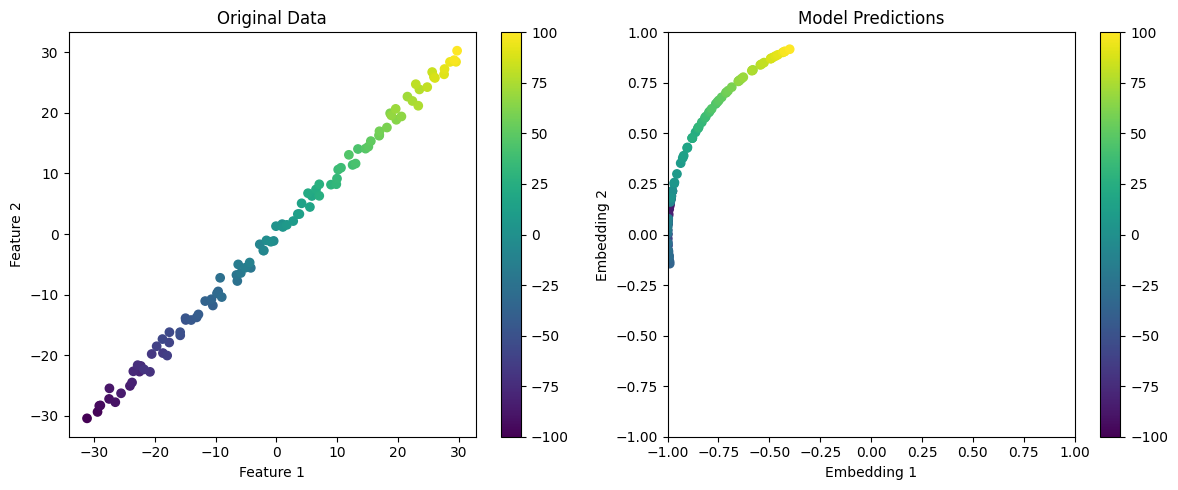

In [31]:
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap='viridis')
plt.colorbar()
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Predictions
plt.subplot(1, 2, 2)
plt.scatter(predictions[:, 0], predictions[:, 1], c=y_test.flatten(), cmap='viridis')
plt.colorbar()
plt.title('Model Predictions')
plt.xlabel('Embedding 1')
plt.ylabel('Embedding 2')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.tight_layout()
plt.show()

In [ ]:
res = 1.0 / 